In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('data/data.csv')

In [4]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [5]:
label = 'HT_0.0F'

In [6]:
train_stats = train_dataset.describe()
train_stats.pop(label)
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Barrel,6074.0,1.725387,0.901172,1.000,1.00000,1.000,3.00000,3.000
Temp,6074.0,99.603227,9.605197,65.000,85.00000,105.000,105.00000,105.000
RT_-1.8F,6074.0,0.594332,0.170236,0.027,0.48625,0.640,0.73500,0.836
RT_-0.9F,6074.0,0.636908,0.184060,0.020,0.51800,0.693,0.79000,0.861
RT_0.0F,6074.0,0.682392,0.130658,0.271,0.57200,0.698,0.80400,0.863
RT_0.9F,6074.0,0.635368,0.182515,0.025,0.52000,0.688,0.78900,0.863
RT_1.8F,6074.0,0.591844,0.173381,0.016,0.48400,0.638,0.73575,0.836


In [7]:
train_Y = train_dataset.pop(label)
test_Y = test_dataset.pop(label)

In [8]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
train_X = norm(train_dataset)
test_X = norm(test_dataset)

In [9]:
with tf.device("/gpu:0"):
    train_X2 = tf.convert_to_tensor(train_X, dtype=tf.float32)
    train_Y2 = tf.convert_to_tensor(train_X, dtype=tf.float32)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dense(units=15, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                260       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 912
Trainable params: 912
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(train_X, train_Y, epochs=1000, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

Epoch 1/1000
143/143 [==============================] - 1s 3ms/step - loss: 0.0597 - val_loss: 0.0104
Epoch 2/1000
143/143 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0090
Epoch 3/1000
143/143 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 4/1000
143/143 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 5/1000
143/143 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 6/1000
143/143 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0073
Epoch 7/1000
143/143 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0069
Epoch 8/1000
143/143 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0067
Epoch 9/1000
143/143 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0067
Epoch 10/1000
143/143 [==============================] - 0s 2ms/step - loss: 0.006

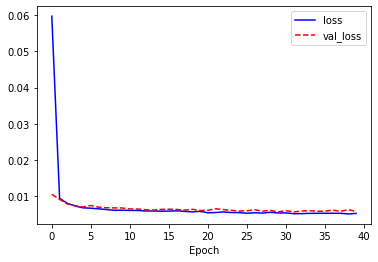

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [12]:
model.evaluate(test_X, test_Y)

48/48 [==============================] - 0s 937us/step - loss: 0.0053


0.005285298451781273

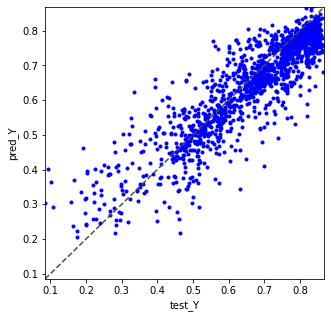

In [13]:
tf.random.set_seed(126)

import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()